<img height="70" src="slogan.png" width="600">


<center><h1><u>Ejemplos Modelos de Machine Learning</u></h1>

# Predicción de la especie de un pinguino

## 1. Definición del problema

Este ejercicio tiene como objetivo predecir la especie a la que pertenece un pinguino basado en sus características físicas para lo cuál se utilizará el conjunto de datos "Palmer Penguins".

## 2. Recopilación y carga de datos

El conjunto de datos "Palmer Penguins" es una recopilación de información sobre pingüinos de tres especies distintas que anidan en la colonia del Archipiélago Palmer, en la Antártida. Este dataset proporciona datos sobre las medidas corporales de los pingüinos, como la longitud y profundidad del pico, la longitud de la aleta y la masa corporal. Además, incluye detalles sobre el sexo y el año de observación.

A continuación la descripción de cada columna:


*  **species:** Especie del pingüino (Adelie, Chinstrap, Gentoo).
*  **island:** Isla donde se encuentra la colonia de pingüinos (Torgersen, Dream, Biscoe).
*   **bill_length_mm:** Longitud del pico en milímetros.
*  **bill_depth_mm:** Profundidad del pico en milímetros.
*  **flipper_length_mm:** Longitud de la aleta en milímetros.
*  **body_mass_g:** Masa corporal del pingüino en gramos.
*  **sex:** Sexo del pingüino (Male, Female).
*  **year:** Año de la observación (2007, 2008, 2009).

[Fuente](https://www.kaggle.com/parulpandey/palmer-archipelago-antarctica-penguin-data)

**Cargar las librerías para el análisis de datos**


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Cargar el dataset**

In [2]:
df = pd.read_csv('penguins.csv')
df.head()

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


Verificar las características del dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         344 non-null    int64  
 1   species            344 non-null    object 
 2   island             344 non-null    object 
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                333 non-null    object 
 8   year               344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB


Cambiar nombre de las columnas



In [4]:
# Definir un diccionario, donde la clave es el nombre actual de las columnas y el valor es el nuevo nombre de la columna
nuevos_nombres = {'Unnamed: 0': 'indice',
                  'species': 'especie',
                  'island': 'isla',
                  'bill_length_mm':'largo_pico_mm',
                  'bill_depth_mm':'profundidad_pico_mm',
                  'flipper_length_mm':'largo_aleta_mm',
                  'body_mass_g':'peso_g',
                  'sex':'sexo',
                  'year':'año_observacion'
}
nuevos_nombres

{'Unnamed: 0': 'indice',
 'species': 'especie',
 'island': 'isla',
 'bill_length_mm': 'largo_pico_mm',
 'bill_depth_mm': 'profundidad_pico_mm',
 'flipper_length_mm': 'largo_aleta_mm',
 'body_mass_g': 'peso_g',
 'sex': 'sexo',
 'year': 'año_observacion'}

In [5]:
# Utilizo el método rename. El parámetro inplace me permite guardar los cambios en el df
df.rename(columns=nuevos_nombres,inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   indice               344 non-null    int64  
 1   especie              344 non-null    object 
 2   isla                 344 non-null    object 
 3   largo_pico_mm        342 non-null    float64
 4   profundidad_pico_mm  342 non-null    float64
 5   largo_aleta_mm       342 non-null    float64
 6   peso_g               342 non-null    float64
 7   sexo                 333 non-null    object 
 8   año_observacion      344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB


## 3. Análisis exploratorio de datos (EDA) y limpieza de datos

**Eliminar columnas**


Eliminar la columna año de observación que no es relevante para el análisis

In [7]:
df.drop(columns=['año_observacion'], inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   indice               344 non-null    int64  
 1   especie              344 non-null    object 
 2   isla                 344 non-null    object 
 3   largo_pico_mm        342 non-null    float64
 4   profundidad_pico_mm  342 non-null    float64
 5   largo_aleta_mm       342 non-null    float64
 6   peso_g               342 non-null    float64
 7   sexo                 333 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


#### Revisar valores nulos


In [9]:
df.isna().sum()

indice                  0
especie                 0
isla                    0
largo_pico_mm           2
profundidad_pico_mm     2
largo_aleta_mm          2
peso_g                  2
sexo                   11
dtype: int64

Encontrar las filas con valores nulos

In [10]:
nulos = df[df.isnull().any(axis=1)]
nulos

,indice,especie,isla,largo_pico_mm,profundidad_pico_mm,largo_aleta_mm,peso_g,sexo
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,9,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,10,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,11,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,12,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,48,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
178,179,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
218,219,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
256,257,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
268,269,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


Se puede observar que tengo registros que tienen todos los valores numéricos nulos. Puedo eliminar esos registros.


In [11]:
# Eliminar filas con valores nulos columnas definidas
df = df.dropna(subset=['largo_pico_mm', 'profundidad_pico_mm', 'largo_aleta_mm', 'peso_g'])

In [12]:
#Valores nulos
df.isna().sum()

indice                 0
especie                0
isla                   0
largo_pico_mm          0
profundidad_pico_mm    0
largo_aleta_mm         0
peso_g                 0
sexo                   9
dtype: int64

Hay que completar los valores nulos con un valor

In [13]:
# En la columna sexo voy a llenar los valores nulos con el valor más frecuente
df['sexo'].value_counts(dropna=False)

sexo
male      168
female    165
NaN         9
Name: count, dtype: int64

In [14]:
# En la columna sexo voy a llenar los valores nulos con el valor más frecuente
df['sexo'] = df['sexo'].fillna(df['sexo'].value_counts().head(1).index[0])

In [15]:
#Comprobamos los valores nulos
df.isna().sum()

indice                 0
especie                0
isla                   0
largo_pico_mm          0
profundidad_pico_mm    0
largo_aleta_mm         0
peso_g                 0
sexo                   0
dtype: int64

Se puede observar que ya no existen valores nulos en el Data Frame

### 3.1 Análisis univariado

In [16]:
#Obtengo las columnas numéricas y categóricas
columnas_numericas = set(df.describe().columns)
columnas_categoricas = set(df.columns)-columnas_numericas
columnas_categoricas = list(columnas_categoricas)
columnas_numericas = list(columnas_numericas)

In [17]:
print("Las columnas categóricas son:", columnas_categoricas)
print("Las columnas númericas son:", columnas_numericas)

Las columnas categóricas son: ['isla', 'sexo', 'especie']
Las columnas númericas son: ['profundidad_pico_mm', 'largo_pico_mm', 'largo_aleta_mm', 'peso_g', 'indice']


#### 3.1.1 Variables categóricas 

Obtener la distribución de las variables categóricas


In [18]:
#Obtengo la distribución de cada variable cualitativa
for columna in columnas_categoricas:
    valores = df[columna].value_counts()
    proporciones = df[columna].value_counts(normalize=True)*100
    resultado = pd.DataFrame({'Cantidad': valores, 'Porcentaje': proporciones})
    print("\n",columna.upper(),"\n",resultado)


 ISLA 
            Cantidad  Porcentaje
isla                           
Biscoe          167   48.830409
Dream           124   36.257310
Torgersen        51   14.912281

 SEXO 
         Cantidad  Porcentaje
sexo                        
male         177   51.754386
female       165   48.245614

 ESPECIE 
            Cantidad  Porcentaje
especie                        
Adelie          151   44.152047
Gentoo          123   35.964912
Chinstrap        68   19.883041


#### Visualización de datos 

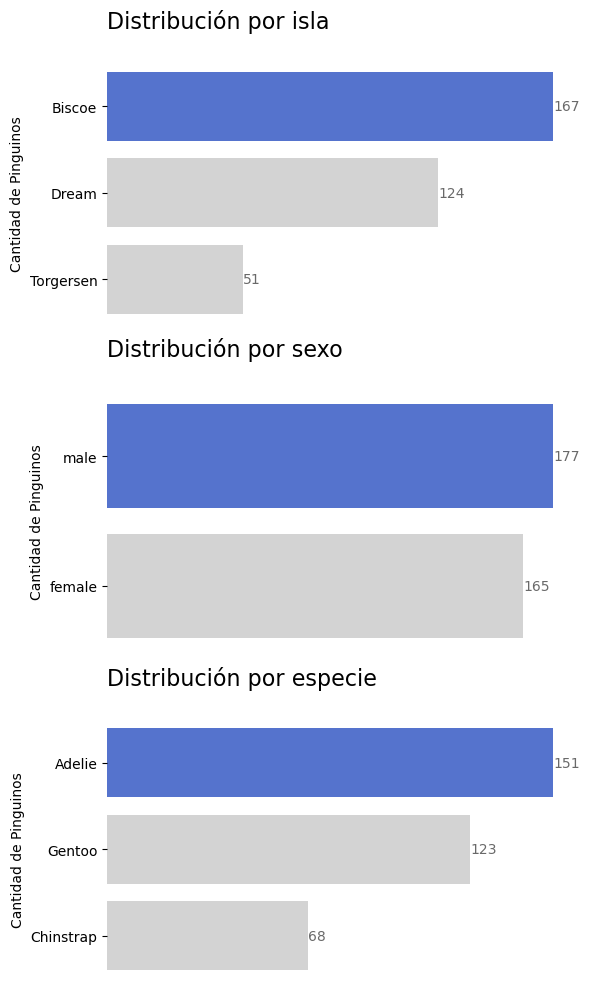

In [19]:
# Crear las figuras necesarias
fig, ax = plt.subplots(len(columnas_categoricas), 1, figsize=(6, 10))

for columna in columnas_categoricas:
    i=columnas_categoricas.index(columna)   
    # Obtener el orden de los valores más altos a más bajos
    orden = df[columna].value_counts().index
    graf = sns.countplot(df,y=columna,ax=ax[i],order=orden, palette=["royalblue",'lightgray','lightgray']
                        )
    # Quitar el borde del gráfico
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['bottom'].set_visible(False)
    ax[i].spines['left'].set_visible(False)
    # Quitar la marcas del eje x
    ax[i].tick_params(axis='x', which='both', length=0)
    ax[i].set_xticklabels([])
    # Nombres de los ejes
    ax[i].set_ylabel("Cantidad de Pinguinos",size=10)
    ax[i].set_xlabel("")
    # Título del gráfico
    ax[i].set_title("Distribución por "+ columna+'\n', size=16, loc='left')
    graf.bar_label(graf.containers[0], size=10, color='dimgray')
    
plt.tight_layout()
plt.show()

De las tablas y gráficos anteriores se puede observar que: 
- La mayoría de pinguinos habitan en la isla Biscoe (177 pinguinos que representan el 48.8%)
- Se tiene un mayor porcentaje de pinguinos machos (51.75%)
- El 44.15% son pinguinos de la especie Adelie (151 ejemplares)

#### 3.1.2 Variables numéricas

In [20]:
#Elimino la columna indice de la lista
columnas_numericas.remove('indice')
columnas_numericas

['profundidad_pico_mm', 'largo_pico_mm', 'largo_aleta_mm', 'peso_g']

Obtener las estadisticas descriptivas

In [21]:
df[columnas_numericas].describe()

,profundidad_pico_mm,largo_pico_mm,largo_aleta_mm,peso_g
count,342.000000,342.000000,342.000000,342.000000
mean,17.151170,43.921930,200.915205,4201.754386
std,1.974793,5.459584,14.061714,801.954536
min,13.100000,32.100000,172.000000,2700.000000
25%,15.600000,39.225000,190.000000,3550.000000
50%,17.300000,44.450000,197.000000,4050.000000
75%,18.700000,48.500000,213.000000,4750.000000
max,21.500000,59.600000,231.000000,6300.000000


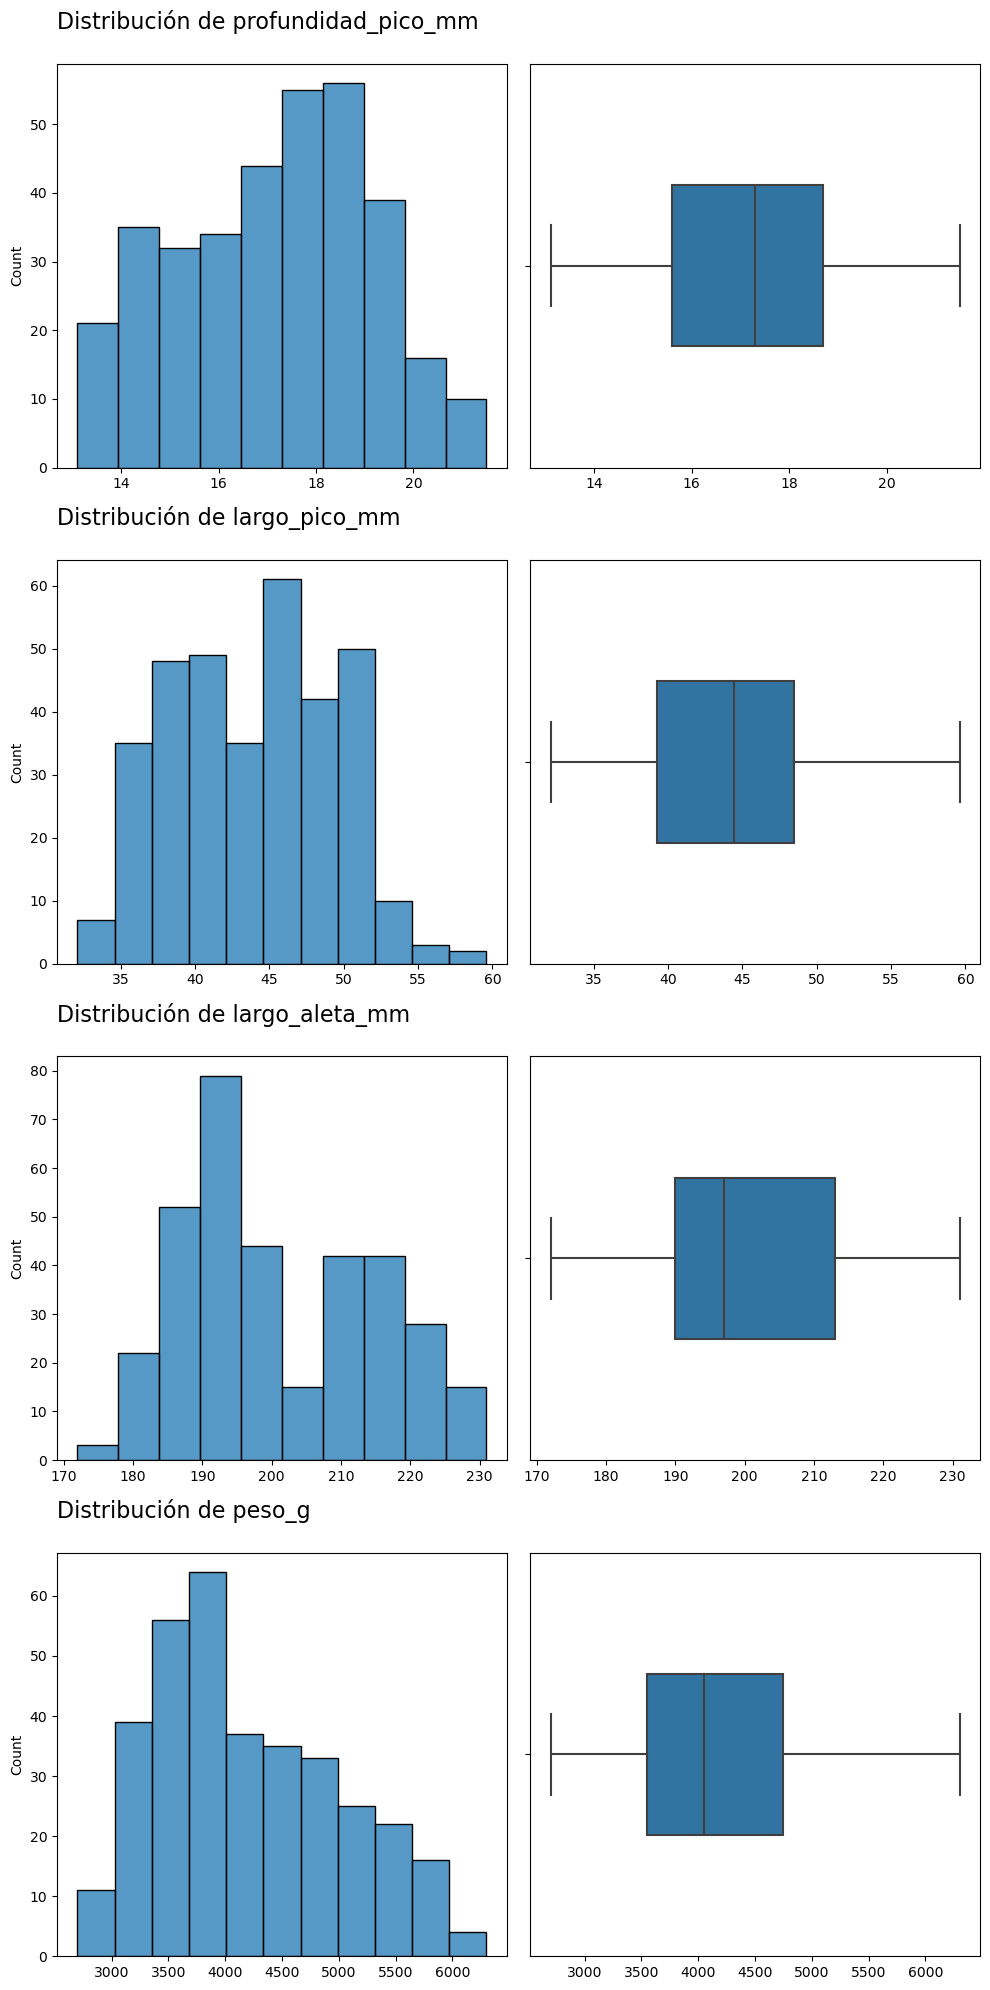

In [22]:
# Crear las figuras necesarias
fig, ax = plt.subplots(len(columnas_numericas), 2, figsize=(10, 20))

for columna in columnas_numericas:
    i=columnas_numericas.index(columna)
    #Histograma
    sns.histplot(data=df,x=columna, ax=ax[i][0], kde=False)
    #Boxplot
    sns.boxplot(data=df, x=columna, ax=ax[i][1], orient='h', width=0.4)       
    # Quitar titulo del eje x
    ax[i][0].set_xlabel("")
    ax[i][1].set_xlabel("")    
    # Título del gráfico
    ax[i][0].set_title("Distribución de "+ columna+'\n', size=16, loc='left')
    
    
plt.tight_layout()
plt.show()

En las estadísticas y gráficos anteriores podemos observar:
   - La mediana de la profundidad del pico es 17.15 
   - No se visualizan valores extremos en ninguna de las variables

### 3.2 Análisis bivariado

**Distribución de las especies por islas**

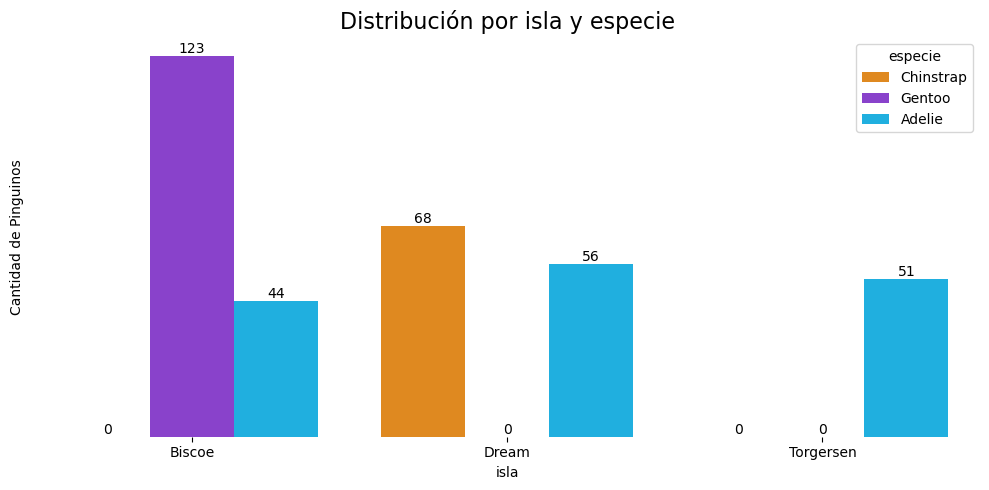

In [23]:
#Distribución de las especies por islas

colores = ['darkorange','blueviolet','deepskyblue']

# Obtener el orden deseado de las especies para cada isla

# Crear el gráfico de barras y ordenar las barras en el eje y
fig, ax = plt.subplots(1, 1, figsize=(10, 5 )) # Ajustar el tamaño de la figura según sea necesario
graf = sns.countplot(data=df, hue='especie', x='isla' , palette=colores
                  , order=df['isla'].value_counts(ascending=False).index
                   , hue_order=df['especie'].value_counts(ascending=True).index)
# Quitar el borde del gráfico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
# Nombres de los ejes
ax.set_ylabel("Cantidad de Pinguinos",size=10)
# Quitar la marcas del eje x
ax.tick_params(axis='y', which='both', length=0)
ax.set_yticklabels([])
# Título del gráfico
ax.set_title("Distribución por isla y especie", size=16)
#Etiquetas

# Etiquetas de las barras si el valor es distinto de cero
for container in graf.containers:
    graf.bar_label(container, size=10)
    
    
# Ajustar la posición de la leyenda
##plt.legend(loc='upper left', bbox_to_anchor=(1.01, 1))

# Ajustar los márgenes del gráfico
plt.subplots_adjust(right=0.7)
    
        
plt.tight_layout()
plt.show()



Como se puede observar en el gráfico:

 - Los pingüinos Adelie son los únicos que se encuentran en las tres islas.
 - Los pingüinos Gentoo solo se encuentran en la isla Biscoe.
 - Los pingüinos Chinstrap solo se encuentran en la isla Dream.
 - En la isla Torgersen solo habitan pingüinos Adelie.

**Largo de la aleta por especie**

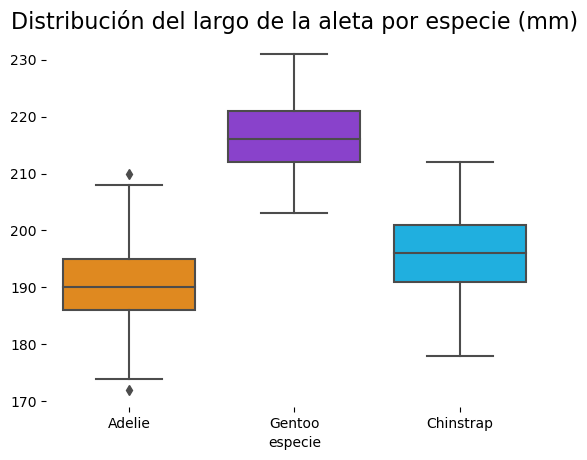

In [24]:
#Boxplot
ax = sns.boxplot(x= 'especie', y= 'largo_aleta_mm', data=df, palette=colores)
# Título del gráfico
ax.set_title("Distribución del largo de la aleta por especie (mm)", size=16)
# Quitar el borde del gráfico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Nombres de los ejes
ax.set_ylabel("")

plt.show()

Se puede observar que la especie Gentoo tiene la aleta más larga

**Peso por especie**

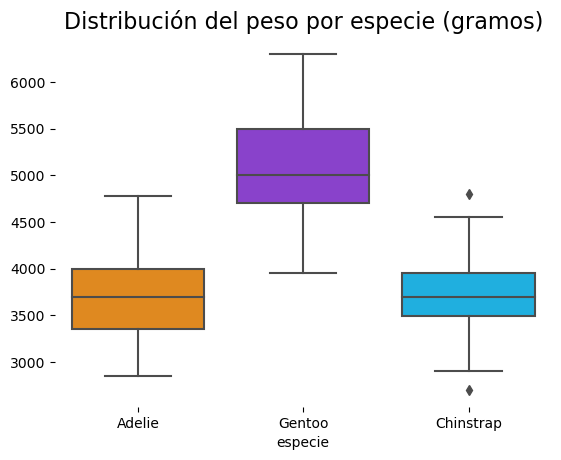

In [25]:
#Boxplot
ax = sns.boxplot(x= 'especie', y= 'peso_g', data=df, palette=colores)
# Título del gráfico
ax.set_title("Distribución del peso por especie (gramos)", size=16)
# Quitar el borde del gráfico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Nombres de los ejes
ax.set_ylabel("")

plt.show()

La especie Gentoo tiene mayor peso en gramos

**Largo del pico por especie**

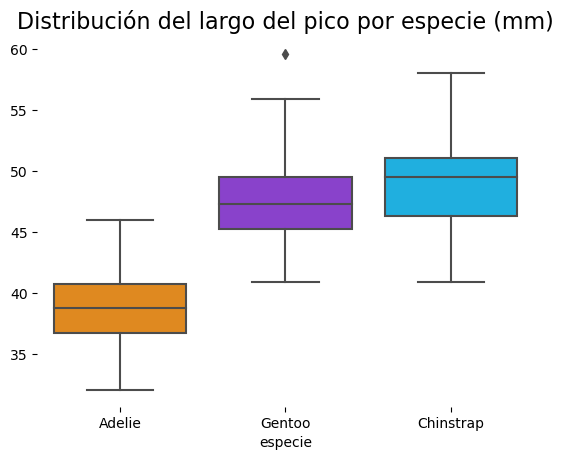

In [26]:
#Boxplot
ax = sns.boxplot(x= 'especie', y= 'largo_pico_mm', data=df, palette=colores)
# Título del gráfico
ax.set_title("Distribución del largo del pico por especie (mm)", size=16)
# Quitar el borde del gráfico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Nombres de los ejes
ax.set_ylabel("")

plt.show()

La especia Adelie tiene el pico más corto

**Profundidad del pico por especie**

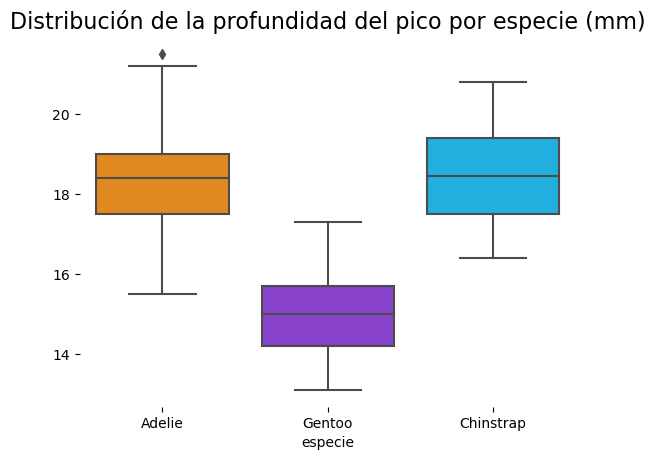

In [27]:
#Boxplot
ax = sns.boxplot(x= 'especie', y= 'profundidad_pico_mm', data=df, palette=colores)
# Título del gráfico
ax.set_title("Distribución de la profundidad del pico por especie (mm)", size=16)
# Quitar el borde del gráfico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Nombres de los ejes
ax.set_ylabel("")

plt.show()

La especia Adelie tiene la menor profundidad del pico

#### Relación entre el peso y las demás variables cuantitativas

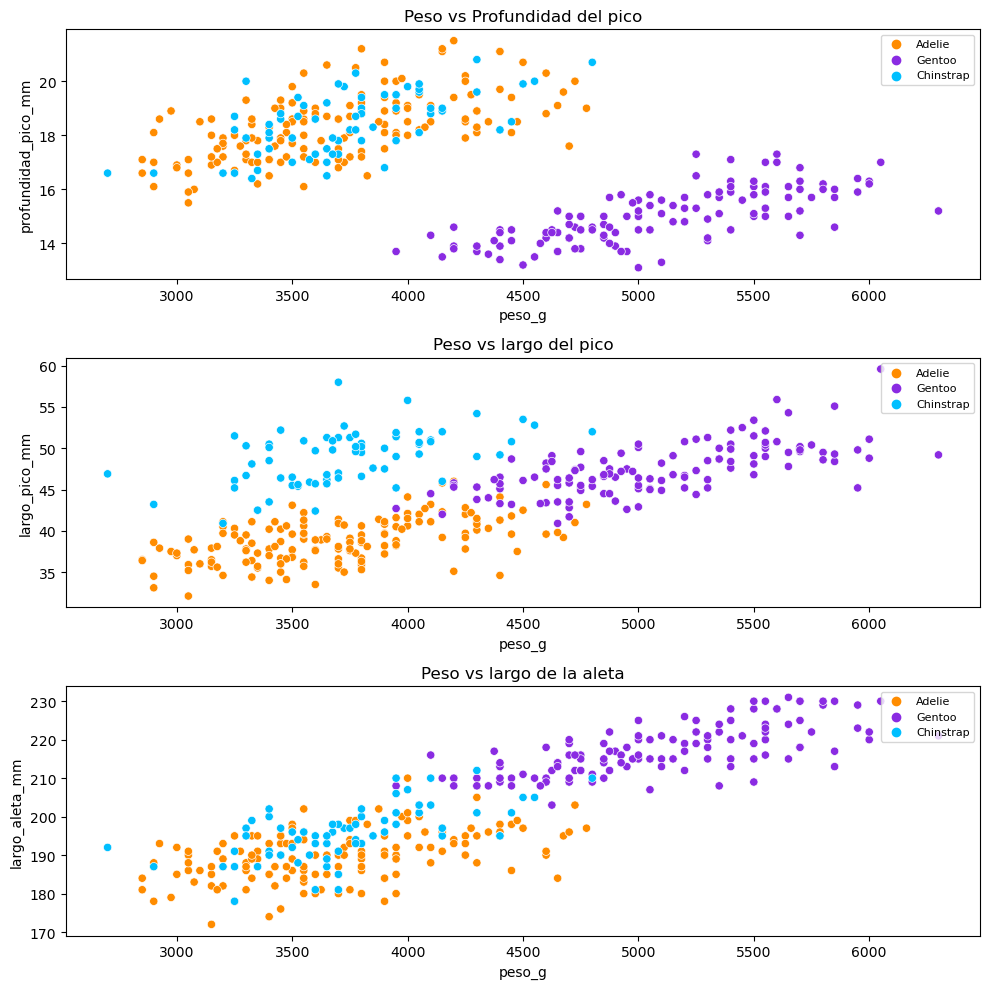

In [28]:
# Crear el lienzo con tres gráficos
fig, axes = plt.subplots(nrows=3, figsize=(10, 10))

# Crear los gráficos de dispersión del peso vs las demás variables
sns.scatterplot(data=df, x='peso_g', y='profundidad_pico_mm', hue='especie', ax=axes[0], palette=colores)
axes[0].legend(fontsize=8, loc='upper right')
sns.scatterplot(data=df, x='peso_g', y='largo_pico_mm', hue='especie', ax=axes[1],  palette=colores)
axes[1].legend(fontsize=8, loc='upper right')
sns.scatterplot(data=df, x='peso_g', y='largo_aleta_mm', hue='especie', ax=axes[2], palette=colores)
axes[2].legend(fontsize=8, loc='upper right')
    
# Añadir títulos y etiquetas 
axes[0].set_title('Peso vs Profundidad del pico')
axes[1].set_title('Peso vs largo del pico')
axes[2].set_title('Peso vs largo de la aleta')

plt.tight_layout()
plt.show()

#### Matriz de correlación - Variables Cuantitativas

In [29]:
correlacion = df[columnas_numericas].corr()
correlacion

,profundidad_pico_mm,largo_pico_mm,largo_aleta_mm,peso_g
profundidad_pico_mm,1.000000,-0.235053,-0.583851,-0.471916
largo_pico_mm,-0.235053,1.000000,0.656181,0.595110
largo_aleta_mm,-0.583851,0.656181,1.000000,0.871202
peso_g,-0.471916,0.595110,0.871202,1.000000


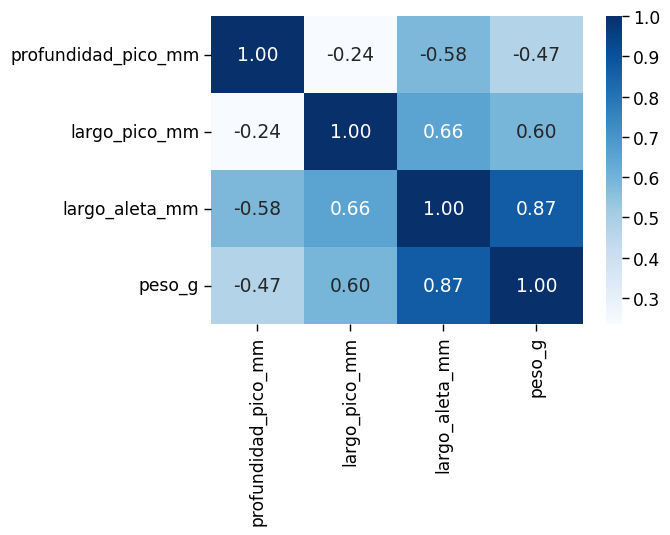

In [30]:
# Visualizar matriz de correlación:
plt.figure(figsize=(6,4))
sns.set_context('paper', font_scale=1.4)
# Calcular los valores absolutos de la matriz de correlación
correlacion_abs = np.abs(correlacion)
sns.heatmap(correlacion_abs, annot=correlacion, cmap='Blues', fmt='.2f')
plt.show()

De la matriz de correlacción podemos obtener las siguientes observaciones:

1. Mientras más largo es el pico del pinguino también es más larga la aleta 
2. Si el pinguino pesa más, tiene el pico y la aleta más larga
3. Mientras mayor es el largo de la aleta, disminuye la profundidad del pico


## 3. Construir el modelo

### 3.1 Dividir los datos en conjuntos de entrenamiento y prueba

El conjunto de entrenamiento es utilizado para entrenar el modelo, mientras que el conjunto de prueba se utilizará para evaluar el modelo entrenado.

In [31]:
from sklearn.model_selection import train_test_split

# Separar las características con las que se entrena el modelo (X) y la variable objetivo (y) 
X = df.drop(['indice','especie','sexo','isla'], axis=1)  # Características
y = df['especie']  # Variable objetivo

# Separar los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
#Obtener el número de filas en el conjunto de entrenamiento y prueba
print("Filas en el conjunto de entrenamiento:",len(y_train))
print("Filas en el conjunto de entrenamiento:",len(y_test))

Filas en el conjunto de entrenamiento: 273
Filas en el conjunto de entrenamiento: 69


In [33]:
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

In [34]:
y_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69 entries, 238 to 67
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   especie  69 non-null     object
dtypes: object(1)
memory usage: 1.1+ KB


Transformar la variable categorica especie a númerica para trabajar en el modelo. Es decir a cada categoría le va a asignar un número.

In [35]:
from sklearn.preprocessing import LabelEncoder

# Crear el objeto LabelEncoder
encoder = LabelEncoder()

y_train_enc=y_train.apply(encoder.fit_transform)
y_test_enc=y_test.apply(encoder.fit_transform)

In [36]:
y_train_enc.sample(10)

,especie
207,2
208,2
285,1
209,2
253,2
142,0
212,2
101,0
275,2
229,2


In [37]:
# Obtener los valores asignados a cada categoría
categorias = encoder.classes_
valores_asignados = encoder.transform(categorias)
print(categorias)
print(valores_asignados)

['Adelie' 'Chinstrap' 'Gentoo']
[0 1 2]


### 3.2 Construir el modelo predictivo (Decision Tree)

In [38]:
from sklearn.tree import DecisionTreeClassifier

DTC = DecisionTreeClassifier(random_state = 123)
DTC.fit(X_train, y_train_enc.values.ravel()) 
predictions = DTC.predict(X_test)   

In [39]:
y_train_enc.values.ravel()

array([0, 0, 0, 1, 1, 1, 0, 1, 2, 1, 0, 0, 2, 0, 1, 0, 0, 0, 1, 0, 2, 2,
       1, 2, 2, 2, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 2, 2, 2, 1, 2, 0, 0, 0,
       0, 0, 1, 2, 0, 0, 0, 1, 1, 0, 2, 0, 2, 1, 0, 2, 1, 2, 2, 2, 2, 0,
       0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 2, 0, 1, 1, 1, 2,
       2, 1, 1, 2, 2, 0, 0, 1, 2, 2, 0, 1, 2, 0, 1, 1, 2, 1, 2, 2, 2, 2,
       2, 0, 0, 2, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 2, 2, 0, 2, 2, 0, 1,
       0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0,
       2, 2, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 2, 2, 1, 2, 2, 0, 2, 0, 0,
       2, 0, 0, 2, 0, 0, 1, 0, 1, 2, 1, 0, 1, 2, 2, 1, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 0, 2, 2, 2, 0,
       0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 2, 2, 1, 0, 1, 2, 0, 0, 2,
       2, 1, 2, 2, 0, 0, 2, 2, 0, 1, 2, 1, 2, 1, 2, 1, 0, 0, 2, 0, 0, 1,
       2, 0, 1, 0, 2, 0, 0, 2, 0])

In [40]:
predictions

array([2, 0, 0, 1, 0, 1, 2, 2, 1, 0, 0, 2, 1, 2, 0, 2, 0, 0, 2, 0, 2, 0,
       1, 0, 0, 0, 2, 2, 0, 1, 2, 0, 0, 2, 0, 0, 2, 1, 2, 0, 0, 0, 2, 2,
       0, 2, 1, 2, 0, 0, 2, 2, 2, 0, 0, 2, 0, 1, 1, 0, 2, 1, 1, 2, 2, 1,
       0, 1, 0])

### 3.2 Evaluar el modelo

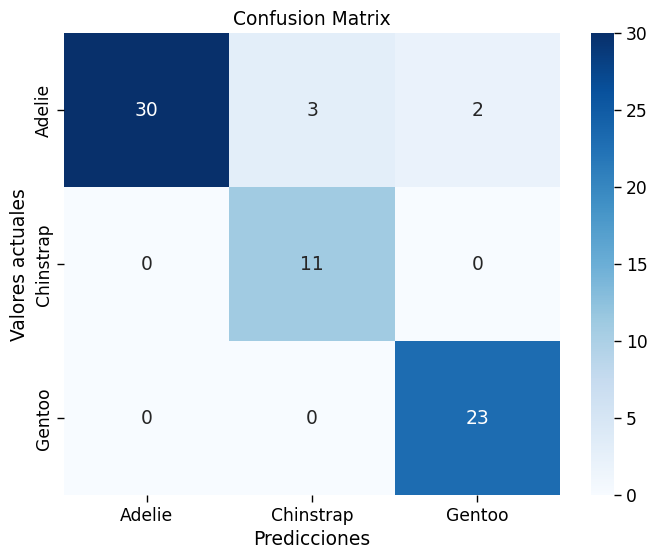

In [41]:
from sklearn.metrics import confusion_matrix
mc=confusion_matrix(y_test_enc, predictions)

# Crear el mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(mc, annot=True, cmap='Blues', xticklabels=categorias, yticklabels=categorias)
plt.xlabel('Predicciones')
plt.ylabel('Valores actuales')
plt.title('Confusion Matrix')
plt.show()

In [42]:

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score


 
print(accuracy_score(y_test_enc, predictions))    
print(recall_score(y_test_enc, predictions,average=None))  
print(precision_score(y_test_enc, predictions, average=None))  
print(f1_score(y_test_enc, predictions, average=None))  
 

0.927536231884058
[0.85714286 1.         1.        ]
[1.         0.78571429 0.92      ]
[0.92307692 0.88       0.95833333]


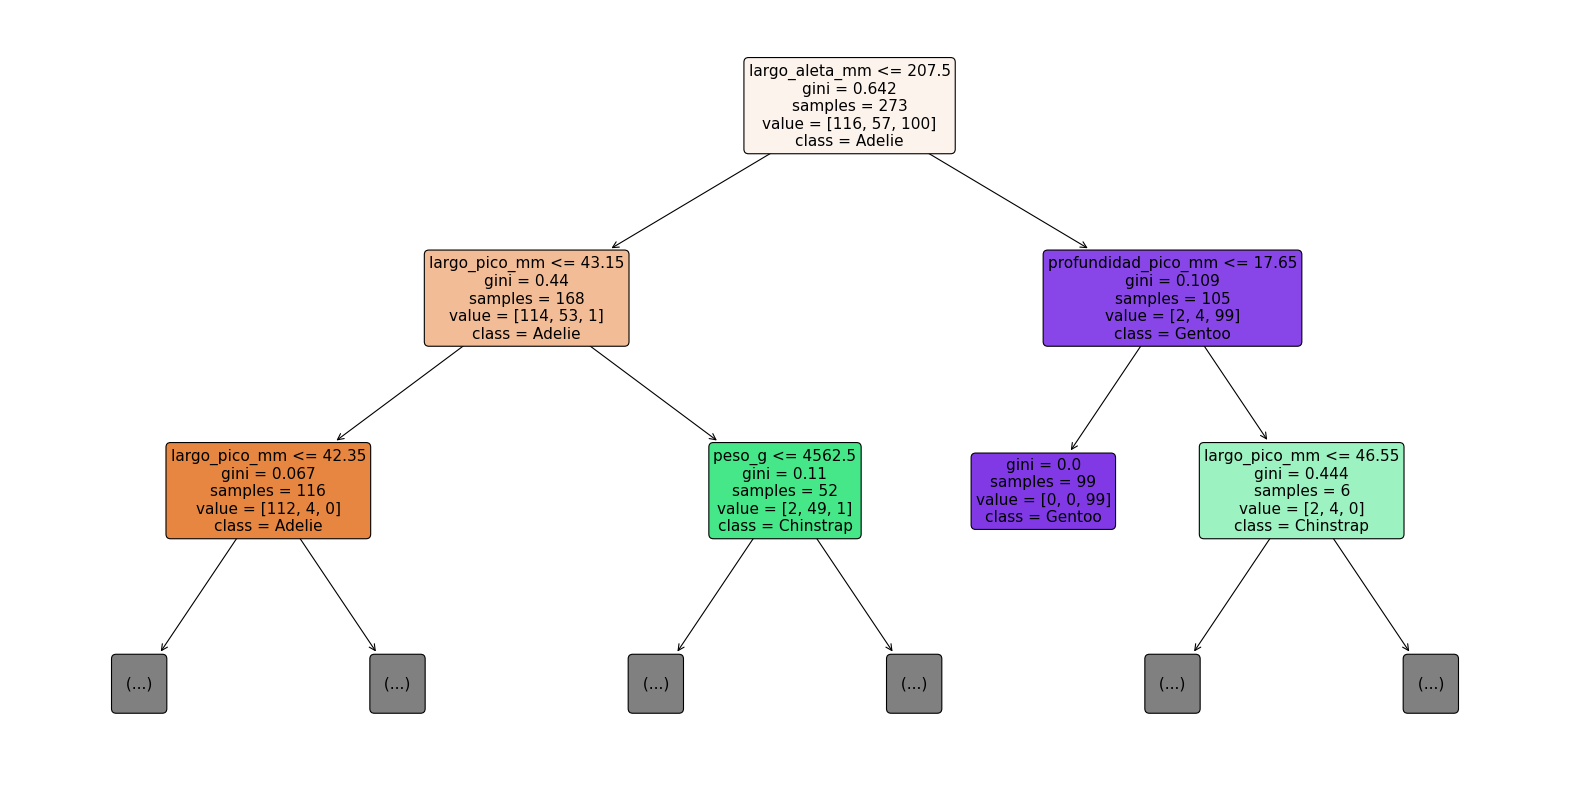

In [43]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))  
plot_tree(DTC, filled=True, feature_names=list(X.columns), class_names=list(categorias), max_depth=2, impurity = True, rounded = True)  # 'X' son tus datos de características
plt.show()

### 3.2 Construir el modelo predictivo (KN Neigbors)

In [44]:
from sklearn.preprocessing import StandardScaler

std= StandardScaler()
x_new_train= std.fit_transform(X_train)
x_new_test= std.fit_transform(X_test)

In [46]:
from sklearn.neighbors import KNeighborsClassifier


KNC = KNeighborsClassifier()
KNC.fit(x_new_train, y_train_enc.values.ravel())    
predictions = KNC.predict(x_new_test)    
print(accuracy_score(y_test_enc, predictions))    
print(confusion_matrix(y_test_enc, predictions))  

0.9855072463768116
[[34  1  0]
 [ 0 11  0]
 [ 0  0 23]]
